In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

In [14]:
# Load the dataset
file_path = "../Datasets/Titanic_dataset.csv"
df = pd.read_csv(file_path)

df_no_preprocessing = df.copy()

df_no_preprocessing["Sex"] = df_no_preprocessing["Sex"].astype("category")
df_no_preprocessing["Pclass"] = df_no_preprocessing["Pclass"].astype("category")
df_no_preprocessing["Cabin"] = df_no_preprocessing["Cabin"].astype("category")
df_no_preprocessing["Embarked"] = df_no_preprocessing["Embarked"].astype("category")

features_nop = ["Pclass", "Sex", "Age", "Fare", "SibSp",  "Parch", "Cabin", "Embarked"]
features = ["Pclass", "Sex", "Age", "Fare", "SibSp",  "Parch", "Embarked_S", "Embarked_Q"]

df["Age"] = df["Age"].fillna(df["Age"].median())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])
df.drop(columns=["Cabin"], inplace=True)
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})

df = pd.get_dummies(df, columns=["Embarked"], drop_first=True)

X_nop = df_no_preprocessing[features_nop]
y_nop = df_no_preprocessing["Survived"]

X = df[features]
y = df["Survived"]

X_train_nop, X_test_nop, y_train_nop, y_test_nop = train_test_split(X_nop, y_nop, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Preprocessed Dataset:\n", X_train.shape, X_test.shape, "\nFeature Names:\n", features, "\n\nNot Preprcessed Dataset:\n", X_train_nop.shape, X_test_nop.shape, "Feature Names:\n", features_nop)

df.head()

Preprocessed Dataset:
 (712, 8) (179, 8) 
Feature Names:
 ['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked_S', 'Embarked_Q'] 

Not Preprcessed Dataset:
 (712, 8) (179, 8) Feature Names:
 ['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch', 'Cabin', 'Embarked']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,1


## Decision Tree

In [3]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=3)

dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
y_pred_dt_train = dt.predict(X_train)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_dt_train = accuracy_score(y_train, y_pred_dt_train)
print("Accuracy train:", accuracy_dt_train, "Acc Test set:", accuracy_dt)

Accuracy train: 0.8342696629213483 Acc Test set: 0.7988826815642458


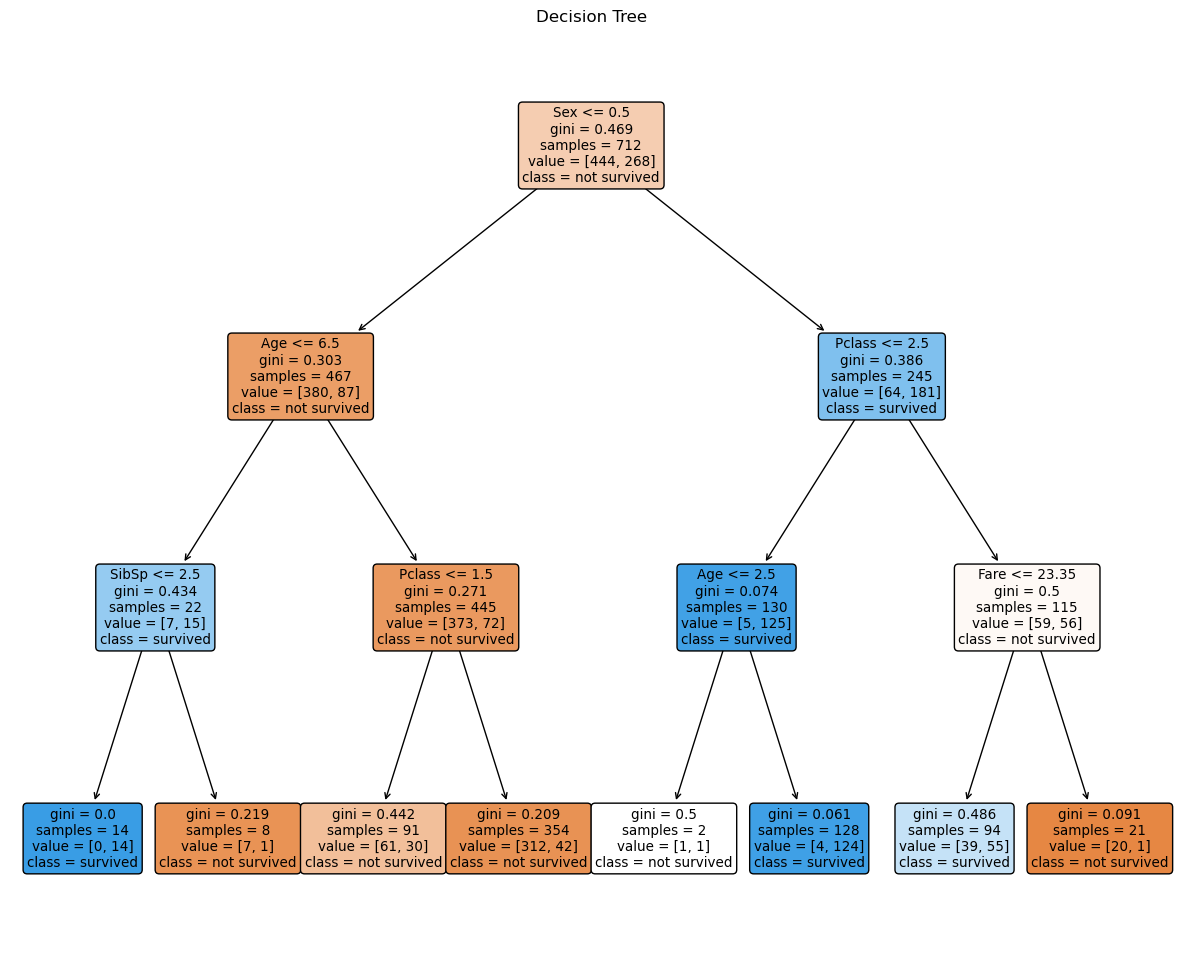

In [4]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,12))
plot_tree(dt,
          filled=True,
          rounded=True,
          feature_names=features,
          class_names=["not survived", "survived"])
plt.title("Decision Tree")
plt.show()

## Random forest

In [5]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_pred_rf_train = rf.predict(X_train)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_rf_train = accuracy_score(y_train, y_pred_rf_train)
print("Accuracy train:", accuracy_rf_train, "Acc Test set:", accuracy_rf)

Accuracy train: 0.9789325842696629 Acc Test set: 0.8044692737430168


## Hyperparameter Fine-tuning

In [6]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50,100,200],
    'max_depth': [5,6,10, None],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2,5,10],
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 200}


## RF and DT for Regression Task

In [7]:
df_reg = pd.read_csv('../Datasets/student_performance_clean.csv')
df_reg['Extracurricular Activities'] = df_reg['Extracurricular Activities'].map({'Yes': 1, 'No': 0})
X_reg = df_reg[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']]
y_reg = df_reg['Performance Index']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

print("Training set size:", X_train_reg.shape)
print("Testing set size:", X_test_reg.shape)

Training set size: (7528, 5)
Testing set size: (1883, 5)


RF Regression MSE: 12.5953, R² Score: 0.9659
DT MSE: 13.6078, R² Score: 0.9632


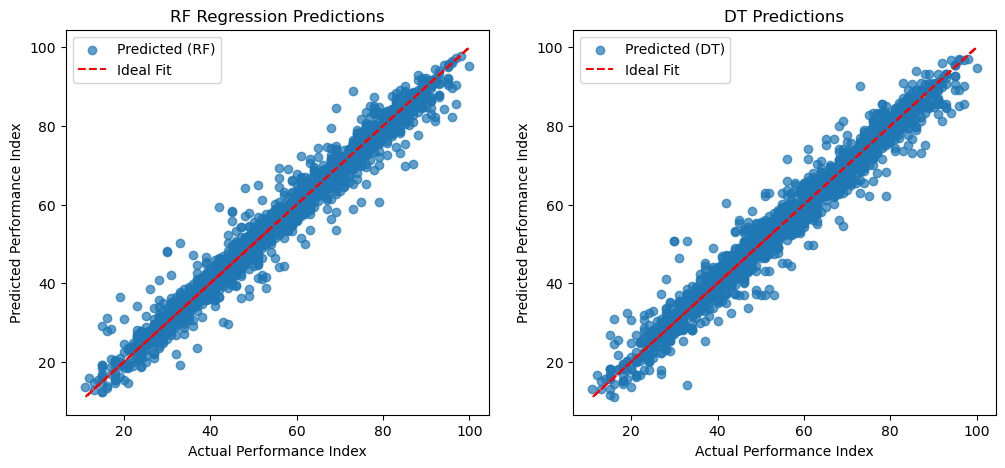

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_reg = RandomForestRegressor(n_estimators=100)
rf_reg.fit(X_train_reg, y_train_reg)
y_pred_rf =rf_reg.predict(X_test_reg)

# Train Linear Regression
dt_reg = DecisionTreeRegressor(max_depth=10)
dt_reg.fit(X_train_reg, y_train_reg)
y_pred_dt = dt_reg.predict(X_test_reg)

# Evaluate models
mse_rf = mean_squared_error(y_test_reg, y_pred_rf)
r2_rf = r2_score(y_test_reg, y_pred_rf)

mse_dt = mean_squared_error(y_test_reg, y_pred_dt)
r2_dt = r2_score(y_test_reg, y_pred_dt)

# Print results
print(f"RF Regression MSE: {mse_rf:.4f}, R² Score: {r2_rf:.4f}")
print(f"DT MSE: {mse_dt:.4f}, R² Score: {r2_dt:.4f}")

# Plot predictions vs actual values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test_reg, y_pred_rf, alpha=0.7, label='Predicted (RF)')
plt.plot(y_test_reg, y_test_reg, color='red', linestyle='dashed', label='Ideal Fit')
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("RF Regression Predictions")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test_reg, y_pred_dt, alpha=0.7, label='Predicted (DT)')
plt.plot(y_test_reg, y_test_reg, color='red', linestyle='dashed', label='Ideal Fit')
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("DT Predictions")
plt.legend()

plt.show()

## XGBoost

In [ ]:
# !pip install xgboost

In [13]:
X_train.dtypes

Pclass        category
Sex           category
Age            float64
Fare           float64
SibSp            int64
Parch            int64
Embarked_S       uint8
Embarked_Q       uint8
dtype: object

In [15]:
from xgboost import XGBClassifier

# create model instance
bst = XGBClassifier(n_estimators=50, max_depth=3, objective='binary:logistic')
# fit model
bst.fit(X_train, y_train)
# make predictions

preds = bst.predict(X_test)
y_pred_bst = bst.predict(X_test)
y_pred_bst_train = bst.predict(X_train)

accuracy_bst = accuracy_score(y_test, y_pred_bst)
accuracy_bst_train = accuracy_score(y_train, y_pred_bst_train)
print("Accuracy train:", accuracy_bst_train, "Acc Test set:", accuracy_bst)

Accuracy train: 0.901685393258427 Acc Test set: 0.8324022346368715


## SHAP Values

In [64]:
# !pip install shap

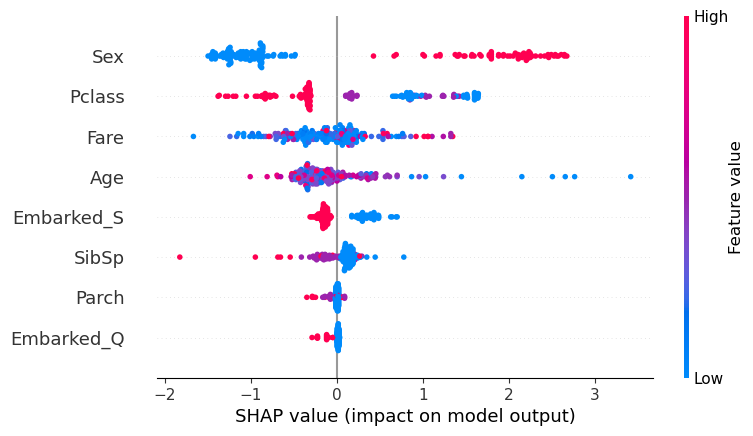

In [16]:
import shap
shap.initjs()

explainer = shap.TreeExplainer(bst)
explanation = explainer(X_test)

shap_values = explanation.values

shap.plots.beeswarm(explanation)

##  Run XGBoost on dataset without preprocessing

In [18]:
bst = XGBClassifier(n_estimators=50, max_depth=3, objective='binary:logistic', enable_categorical=True)

bst.fit(X_train_nop, y_train_nop)

y_pred_bst = bst.predict(X_test_nop)
y_pred_bst_train = bst.predict(X_train_nop)

accuracy_bst = accuracy_score(y_test_nop, y_pred_bst)
accuracy_bst_train = accuracy_score(y_train_nop, y_pred_bst_train)
print("Accuracy train:", accuracy_bst_train, "Acc Test set:", accuracy_bst)

Accuracy train: 0.9073033707865169 Acc Test set: 0.8156424581005587


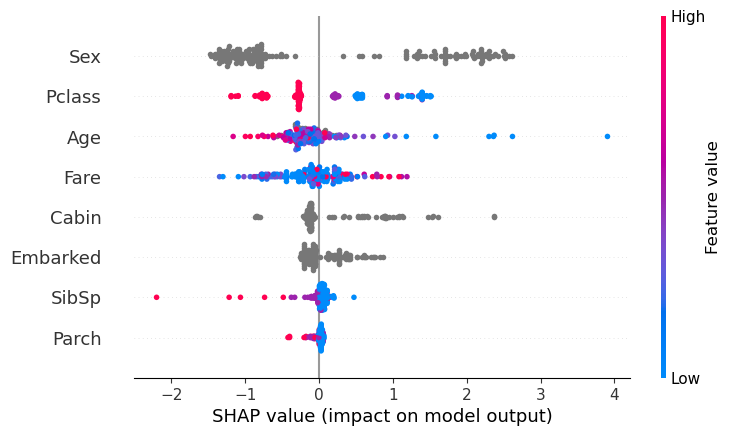

In [20]:
explainer = shap.TreeExplainer(bst)
explanation = explainer(X_test_nop)

shap_values = explanation.values

shap.plots.beeswarm(explanation)

In [21]:
explainer = shap.TreeExplainer(bst)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.force(shap_values[1, ...])